<a href="https://colab.research.google.com/github/DaverArenas/procesamientoSe-alesInteligenciaArtificial/blob/main/Clase8E1_30_09_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesamiento de imagenes - Parte 1

Vamos a realizar el procesamiento, análisis y manipulación de algunas imágenes para mejorar su calidad para la posterior extracción de características. 

## Librerías 
> CV2: [Ver documentación](https://docs.opencv.org/4.5.4/d1/dfb/intro.html)
```
import cv2
img = cv2.imread('xxx.png',0)
cv2.imshow('image',img)
```

> PIL: [Ver documentación](https://pillow.readthedocs.io/en/stable/)
```
!pip install Pillow
import Image
import cv2
im = Image.open('xxx.png')
im.show()
```


> matplotlib.image
```
import matplotlib.image as mpimg 
image = mpimg.imread(pathFile+nameFile)
plt.imshow(image)
```


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install Pillow       

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Cargando las imágenes 

In [ ]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import scipy.misc
import numpy as np
from PIL import Image

In [ ]:
image = scipy.misc.face()

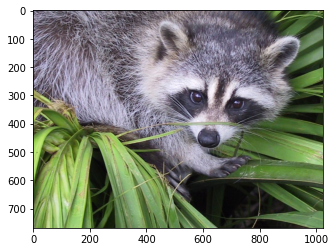

In [ ]:
plt.imshow(image)

In [ ]:
image.shape

(768, 1024, 3)

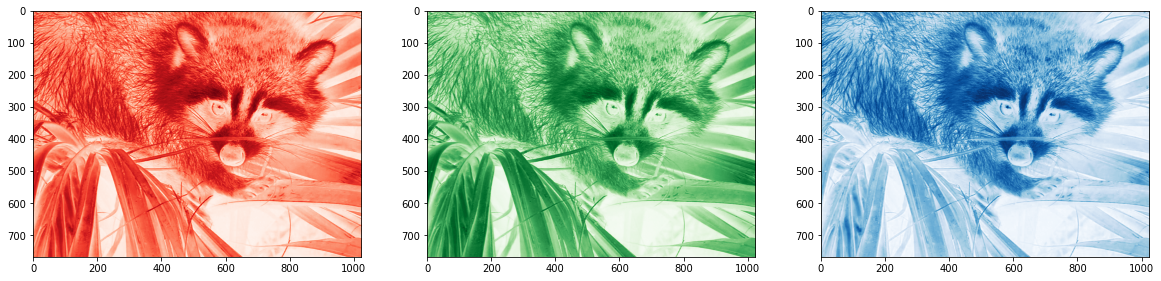

In [ ]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(131)
ax1.imshow(image[:,:,0], cmap = 'Reds')
ax2 = fig.add_subplot(132)
ax2.imshow(image[:,:,1], cmap = 'Greens')
ax3 = fig.add_subplot(133)
ax3.imshow(image[:,:,2], cmap = 'Blues')

# Información estadística de la imagen 

In [ ]:
print('Promedio: ' , image.mean())
print('Máximo: ' , image.max())
print('Minimo: ' , image.min())

Promedio:  110.16274388631184
Máximo:  255
Minimo:  0


## Dominio espacial 


### Transformaciones puntuales


####Escala de grises

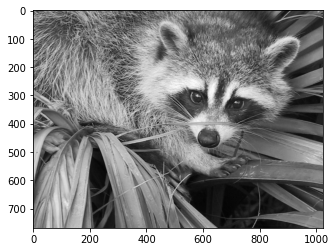

In [ ]:
rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(image, rgb_weights)
plt.imshow(grayscale_image,cmap = plt.get_cmap(name = 'gray'))

In [ ]:
grayscale_image.shape

(768, 1024)

#### Blanco y negro 
Lo primero que vamos a hacer es convertir a blanco y negro dependiendo de una condición.

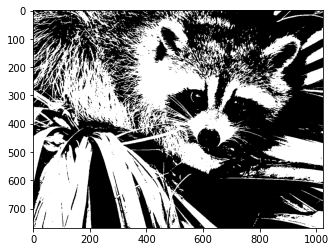

In [ ]:
imBW = np.zeros(shape=(image.shape[0],image.shape[1]))
for fil in range(0, image.shape[0]):
  for col in range(0, image.shape[1]):
    if image[fil][col][1]>128:        #Probar con la imagen en esacala de grises
      imBW[fil][col] = 255
    else:
      imBW[fil][col] = 0
plt.imshow(imBW,  cmap = plt.get_cmap(name = 'gray'))

### Transformaciones locales
**Filtro Media:** El filtro de suavizado más simple es el correspondiente a la media, en la cual se obtiene un píxel de salida haciendo la media aritmética de los píxeles de la ventana elegida. Cuanto mayor sea la ventana, mayor será el efecto de difuminado. A pesar de su sencillez en la implementación, tiene como desventaja su alta sensibilidad a los cambios locales, y la generación de niveles de intensidad que no existían en la imagen original.  

In [ ]:
import scipy.ndimage as ndimage

In [ ]:
local_mean = ndimage.uniform_filter(imBW, size=5)

**Filtro Gaussiano:** Similar al filtro media, pero aplicando una máscara diferente, donde los píxeles más cercanos al píxel actual tienen más peso que los exteriores. Los pesos de los píxeles se calculan con una campana de Gauss dependiente de la distancia al píxel actual, y su varianza indica el nivel de suavizado. Los filtros gaussianos tienen como ventaja el hecho de ser separables, es decir, se pueden realizar con la convolución de dos vectores unidimensionales en lugar de una máscara bidimensional. También mejoran la capacidad de suavizado, introduciendo un parámetro (la varianza) que es independiente del tamaño de la máscara. 

In [ ]:
blurred = ndimage.gaussian_filter(imBW, sigma=3)
very_blurred = ndimage.gaussian_filter(imBW, sigma=10)

Text(0.5, 1.0, 'Filtro Gaussiano sig =10')

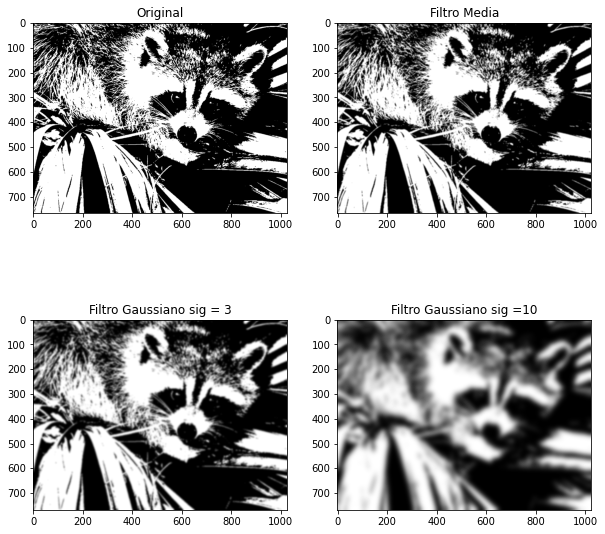

In [ ]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax1.imshow(imBW, cmap = plt.get_cmap(name = 'gray'))
ax1.set_title("Original")
ax2 = fig.add_subplot(222)
ax2.imshow(local_mean,cmap = plt.get_cmap(name = 'gray'))
ax2.set_title("Filtro Media")
ax3 = fig.add_subplot(223)
ax3.imshow(blurred, cmap = plt.get_cmap(name = 'gray'))
ax3.set_title("Filtro Gaussiano sig = 3")
ax4 = fig.add_subplot(224)
ax4.imshow(very_blurred, cmap = plt.get_cmap(name = 'gray'))
ax4.set_title("Filtro Gaussiano sig =10")

**Transformaciones de perfilado** 
Realizan la operación contraria al suavizado. Sirven para destacar y hacer más visibles las variaciones y bordes de la imagen. El perfilado mejora la apariencia difuminada de las imágenes, que puede ser debida a imperfecciones en las lentes u otra causa.  

In [ ]:
blurred_l = ndimage.gaussian_filter(imBW, 3)
filter_blurred_l = ndimage.gaussian_filter(blurred_l, 1)
alpha = 5
sharpened = blurred_l + alpha * (blurred_l - filter_blurred_l)

Text(0.5, 1.0, 'Perfilado')

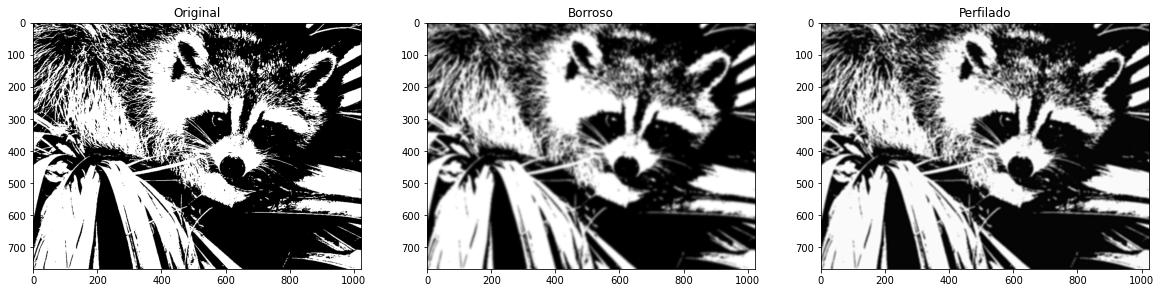

In [ ]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(131)
ax1.imshow(imBW, cmap = plt.get_cmap(name = 'gray'))
ax1.set_title("Original")
ax2 = fig.add_subplot(132)
ax2.imshow(filter_blurred_l,cmap = plt.get_cmap(name = 'gray'))
ax2.set_title("Borroso")
ax3 = fig.add_subplot(133)
ax3.imshow(sharpened, cmap = plt.get_cmap(name = 'gray'))
ax3.set_title("Perfilado")

**Filtrado de ruido en  las imágenes**

Vamos a adicionar una señal de ruido a la imagen y vamos aplicar el filtro de mediana y el gaussiano. 

Puede probar otros filtros como: ```ndimage.maximum_filter```, ```ndimage.percentile_filter```, ```scipy.signal.wiener```


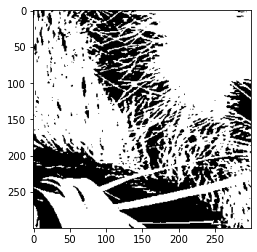

In [ ]:
subImage = imBW[200:500, 200:500]
plt.imshow(subImage, cmap = plt.get_cmap(name = 'gray'))

In [ ]:
gauss_denoised = ndimage.gaussian_filter(subImage, 3) #Sigma: desviación estandar para el kernel 
med_denoised = ndimage.median_filter(subImage, 5)     #Tamaño de la ventana 

Text(0.5, 1.0, 'Fitro Media')

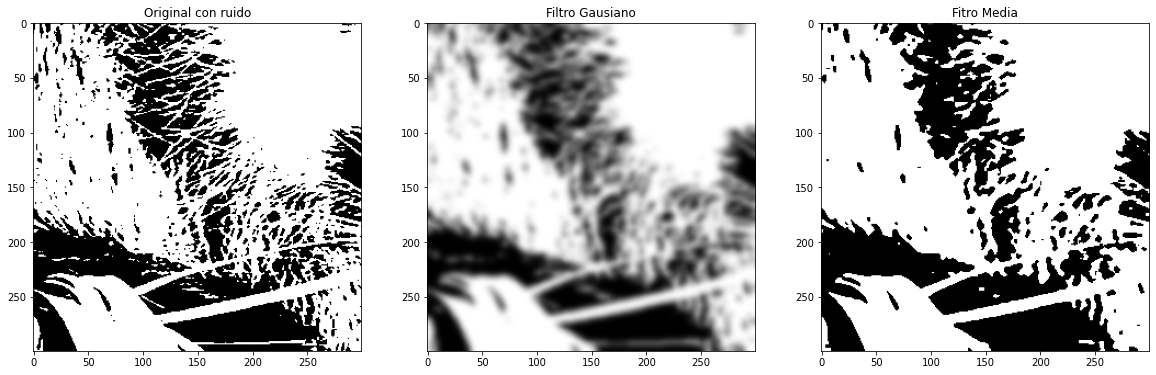

In [ ]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(131)
ax1.imshow(subImage, cmap = plt.get_cmap(name = 'gray'))
ax1.set_title("Original con ruido")
ax2 = fig.add_subplot(132)
ax2.imshow(gauss_denoised,cmap = plt.get_cmap(name = 'gray'))
ax2.set_title("Filtro Gausiano")
ax3 = fig.add_subplot(133)
ax3.imshow(med_denoised, cmap = plt.get_cmap(name = 'gray'))
ax3.set_title("Fitro Media")

## Transformaciones geométricas

Las operaciones geométricas modifican las relaciones espaciales existentes entre los píxeles de una imagen y pueden ser de tres tipos: traslación, escalado y rotación.

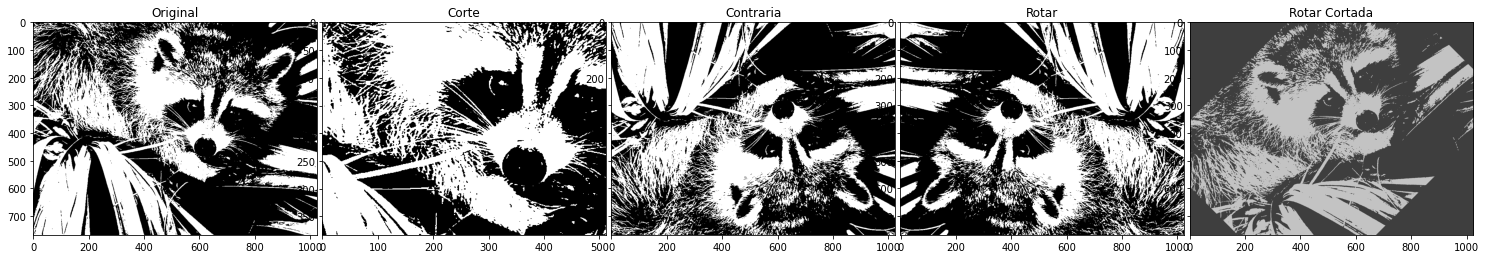

In [ ]:
copyImage = imBW
lx, ly = copyImage.shape

# Corte de la imagen
crop = copyImage[int(lx/4):-int(lx/4),int(ly/4):-int(ly/4)]

# Voltear la image
flip = np.flipud(copyImage)

# Rotar imagen
rotate = ndimage.rotate(copyImage, 180)
rotate_noreshape = ndimage.rotate(copyImage, 45, reshape=False)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(151)
ax1.imshow(copyImage, cmap=plt.cm.gray)
ax1.set_title("Original")

ax2 = fig.add_subplot(152)
ax2.imshow(crop, cmap=plt.cm.gray)
ax2.set_title("Corte")

ax3 = fig.add_subplot(153)
ax3.imshow(flip, cmap=plt.cm.gray)
ax3.set_title("Contraria")

ax4 = fig.add_subplot(154)
ax4.imshow(rotate, cmap=plt.cm.gray)
ax4.set_title("Rotar")

ax5 = fig.add_subplot(155)
ax5.imshow(rotate_noreshape, cmap=plt.cm.gray)
ax5.set_title("Rotar Cortada")

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0,
                    right=1)

plt.show()

## Dominio frecuencial

La función de transferencia de filtrado $H(u, v)$ es aquella que actúa sobre la transformada de Fourier de una imagen $F(u, v)$, y permite suprimir ciertas frecuencias mientras deja otras sin cambio alguno. Las **frecuencias bajas** son responsables de la mayoría de los niveles de gris de una imagen sobre áreas suaves. Mientras que las **frecuencias altas** tienen que ver con los
detalles de la imagen, como son los bordes y el ruido. 

Primero vamos a calcular la DFT centrada en el origen y mostrar la figura del espectro de potencia (su raíz cuadrada).

### **Filtrado de la imágen**

A partir de la transformada de fourier se pueden realizar operaciones en el dominio de la frecuencia como el filtrado y la reconstrucción de la imagen original (DFT inverso).

Vamos a realizar un filtro pasa altas para eliminar las frecuencias bajas, utilizando una ventana de 10x10. 

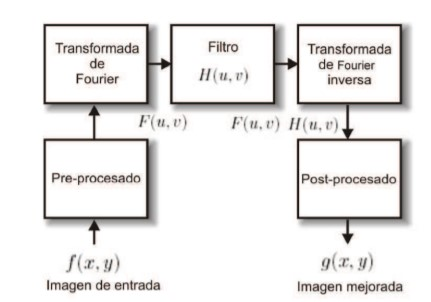

In [ ]:
from numpy.fft import fft2, fftshift, ifft2 

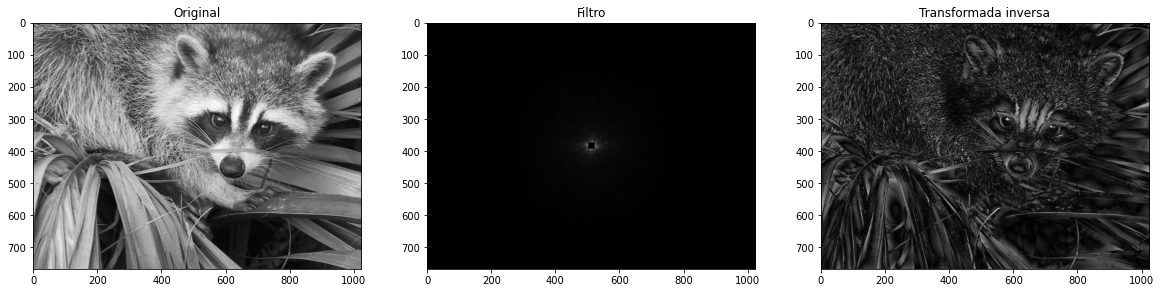

In [ ]:
F2 = fft2(grayscale_image)  
x, y = np.shape(grayscale_image)
fshift = fftshift(F2)                       
crow,ccol = int(x/2) , int(y/2)                 # Se debe realizar el calculo de la transfomrada en el centro de la imágen 
fshift [crow-10:crow+10, ccol-10:ccol+10] = 0   # Para desplazar el resultado N/2 en ambas direcciones, para que quede en el centro 
f_ishift = np.fft.ifftshift(fshift)             # Mueva el componente de frecuencia cero al centro del espectro
img_back = np.fft.ifft2(f_ishift)               # Computa la transformada discreta de fourier inversa
img_back = np.abs(img_back)                     # La transformada devuelve un arreglo complejo por lo tanto se calcula su valor absoluto

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(131)
ax1.imshow(grayscale_image, cmap = 'gray')
ax1.set_title('Original')

ax2 = fig.add_subplot(132)
ax2.imshow(np.abs(fshift), cmap = 'gray')
ax2.set_title('Filtro')

ax3 = fig.add_subplot(133)
ax3.imshow(img_back,cmap = 'gray')
ax3.set_title('Transformada inversa')

plt.show()

El resultado muestra que el Filtro Pasa bajas es una operación de detección de bordes.Esto también muestra que la mayoría de los datos de imagen están presentes en la región de baja frecuencia del espectro. 

## Transformaciones globales

- **Compresión de imágenes.**
Una imagen se puede recuperar usando la transformada inversa de Fourier. Esto se realiza teniendo en cuenta un umbral, con lo cual podemos seleccionar todo lo que sea mayor a un umbral dado $T$
 
Se debe tener en cuenta que $T$ debe ser lo bastante grande para eliminar algún coeficiente y lo bastante pequeño para quedarse con algún coeficiente.

Text(0.5, 1.0, 'Comprimida')

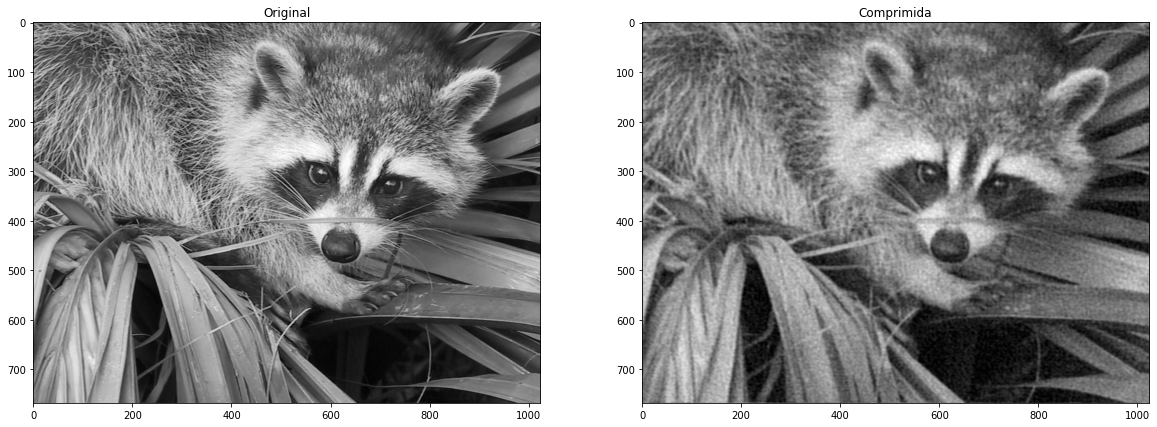

In [ ]:
figure = grayscale_image                                                        # Copia de la imagen 
x, y = np.shape(figure)
F3 = fft2(figure)/float(x*y)                                           
F3 = fftshift(F3)                                                               # Mueve el componente de frecuencia cero al centro del espectro.
P3 = np.abs(F3)                         

T = 0.1                   # Variar T y comprobar la compresión
c = F3 * (P3 >= T)        # Valor absoluto de las fecuencias 
fM = ifft2(c)*x*y         # Transformada discreta de Fourier inversa

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(121)
ax1.imshow(figure, cmap = 'gray')
ax1.set_title("Original")

ax2 = fig.add_subplot(122)
ax2.imshow(np.abs(fM), cmap = 'gray');
ax2.set_title("Comprimida")

In [ ]:
out1 = np.count_nonzero(F3)
out2 = np.count_nonzero(c)
print('Número inicial de elementos distintos de cero = ',out1)
print('Número final de elementos distintos de cero   = ',out2)
print('Relación de compresión                        = ',100 *(1-(out2/out1)))

Número inicial de elementos distintos de cero =  786432
Número final de elementos distintos de cero   =  13237
Relación de compresión                        =  98.31682840983072


# Extracción de características - Parte 2

## Segmentación
Subdivide una imagen en sus regiones u objetos constituyentes, de tal manera que los píxeles de esas regiones posean propiedades o atributos similares, como niveles de gris, contraste o texturas. 
Para esto se utilizaran algunos filtros que vimos anteriormente como el gaussiano y también se puede obtener de manera automática, a partir de un modelo de mezcla gausiana, el cual es un modelo probabilístico que asume que todos los puntos de datos se generan a partir de una mezcla de un número finito de distribuciones gaussianas con parámetros desconocidos.

In [ ]:
from sklearn.mixture import GaussianMixture

Text(0.5, 1.0, 'Imagen binaria')

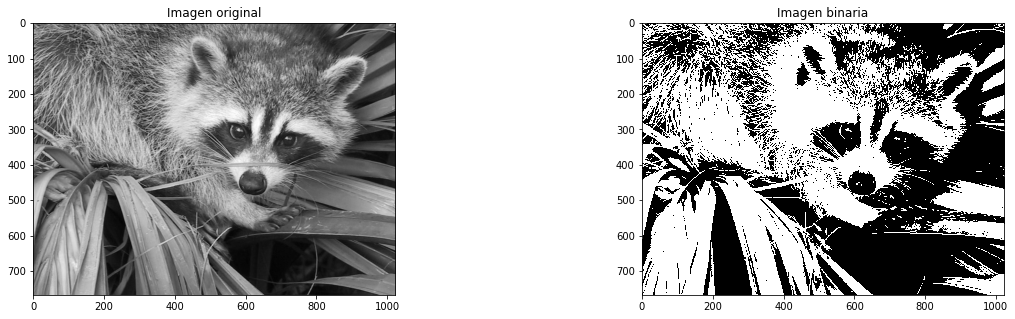

In [ ]:
# Generar el clasificador 
classif =  GaussianMixture(n_components=2)      
# Ajustar el modelo
classif.fit(grayscale_image.reshape((grayscale_image.size, 1)))         
# El umbral se toma como la media de las medias generadas por el clasificador
threshold = np.mean(classif.means_)             
# Se binariza la imágen con el nuevo umbral
binary_img = grayscale_image > threshold                    

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
ax1.imshow(grayscale_image, cmap = 'gray')
ax1.set_title('Imagen original')

ax2 = fig.add_subplot(122)
ax2.imshow(binary_img, cmap=plt.cm.gray, interpolation='nearest')
ax2.set_title('Imagen binaria')

**Operaciones de dilatación y erosión**

La dilatación agrega píxeles a los límites de los objetos de una imagen, mientras que la erosión elimina los píxeles en los límites de los objetos

In [ ]:
# Quita las pequeñas regiones blancas 
open_img = ndimage.binary_opening(binary_img, structure=np.ones((3,3)))     
# Quita los pequeños puntos negros    
close_img = ndimage.binary_closing(open_img)          

Text(0.5, 1.0, 'Contorno')

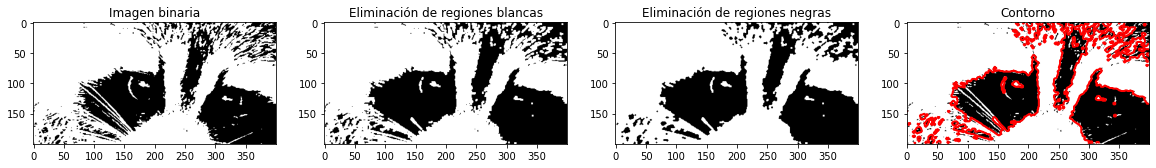

In [ ]:
xs = 200
xe = 400
ys = 400
ye = 800
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(141)
ax1.imshow(binary_img[xs:xe, ys:ye], cmap=plt.cm.gray)
ax1.set_title('Imagen binaria')

ax2 = fig.add_subplot(142)
ax2.imshow(open_img[xs:xe, ys:ye], cmap=plt.cm.gray)
ax2.set_title('Eliminación de regiones blancas')

ax3 = fig.add_subplot(143)
ax3.imshow(close_img[xs:xe, ys:ye], cmap=plt.cm.gray)
ax3.set_title('Eliminación de regiones negras')

ax4 = fig.add_subplot(144)
ax4.imshow(binary_img[xs:xe, ys:ye], cmap=plt.cm.gray)
ax4.contour(close_img[xs:xe, ys:ye], [0.5], linewidths=2, colors='r')
ax4.set_title('Contorno')

## Detección de bordes

El operador Sobel calcula el gradiente de la intensidad de una imagen en cada píxel. Así, para cada punto, este operador proporciona la magnitud del gradiente, su dirección y sentido desde el más oscuro al más claro.

* Nota: El operador `hypot` devuelve la raiz cuadrada de la norma euclidiana $(x * x + y * y).$

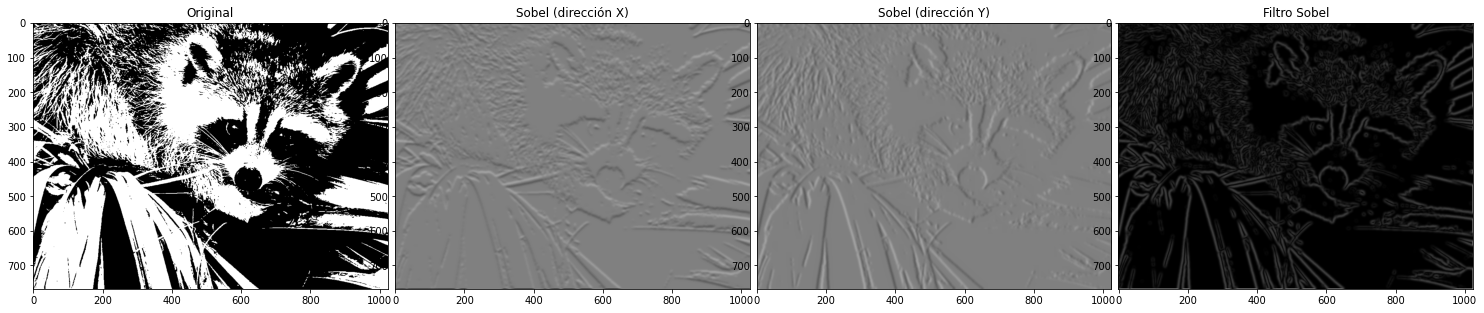

In [ ]:
# Aplicar filtro gausiano
imagSegSobel = ndimage.gaussian_filter(imBW, sigma=3)       
# Operador sobel sobre las 2 dimensiones 
sx = ndimage.sobel(imagSegSobel, axis=0, mode='constant')   
sy = ndimage.sobel(imagSegSobel, axis=1, mode='constant')
sob = np.hypot(sx, sy)

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(141)
ax1.imshow(imBW, cmap=plt.cm.gray)
ax1.set_title("Original")

ax2 = fig.add_subplot(142)
ax2.imshow(sx, cmap=plt.cm.gray)
ax2.set_title("Sobel (dirección X)")

ax3 = fig.add_subplot(143)
ax3.imshow(sy, cmap=plt.cm.gray)
ax3.set_title("Sobel (dirección Y)")

ax4 = fig.add_subplot(144)
ax4.imshow(sob, cmap=plt.cm.gray)
ax4.set_title("Filtro Sobel")

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0, right=1)

### Detector de bordes de Canny.
No sólo usa operadores de gradiente, sino que busca el máximo gradiente a lo largo de un borde. El resultado es una imagen binaria (borde/no borde), ajustable mediante un umbral

In [ ]:
from skimage import feature

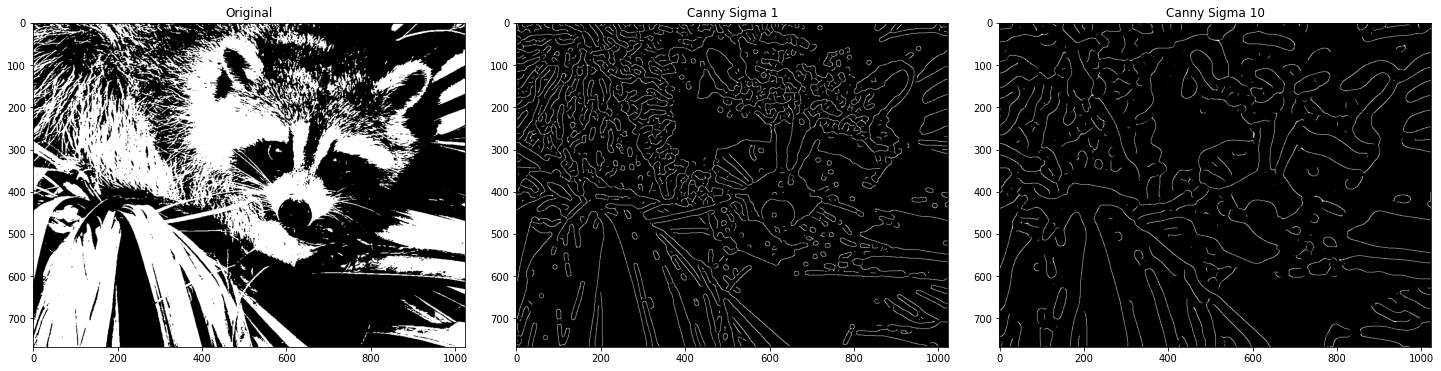

In [ ]:
imagCanny= ndimage.gaussian_filter(imBW, sigma=5)       # Aplicar filtro gausiano
# Generamos caracteristicas para los bordes  
edges1 = feature.canny(imagCanny)                       # Sigma = 1
edges2 = feature.canny(imagCanny, sigma=10)             # A mayor sigma menor cantidad de bordes 

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(131)
ax1.imshow(imBW, cmap = 'gray')
ax1.set_title("Original")

ax2 = fig.add_subplot(132)
ax2.imshow(edges1, cmap = 'gray')
ax2.set_title("Canny Sigma 1")

ax3 = fig.add_subplot(133)
ax3.imshow(edges2 , cmap='gray')
ax3.set_title("Canny Sigma 10")

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0, right=1)

## Contar formas

Teniendo en cuenta los algoritmos para detectar bordes, vamos a realizar un conteo de formas en una imagen histológica de glándulas mamarias. 

In [ ]:
import cv2
pathFile = '/content/drive/MyDrive/Colab Notebooks/2022_II_signal_processing/Clase_8/'
nameFile = 'images.jpg'

Se encontraron 2 formas


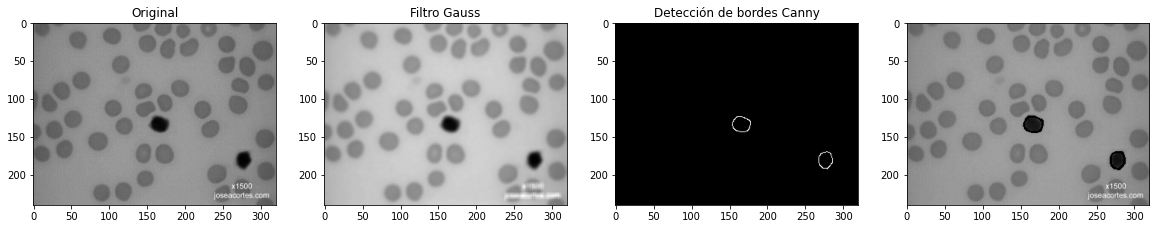

In [ ]:
original = cv2.imread(pathFile+nameFile)
# Convertimos la imágen a escala de grises
gris = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)                               
# Se aplica el suavizado Gaussiano Tamaño de la ventana y sigma 
gauss = cv2.GaussianBlur(gris, (5,5), 10)                     
# Detectamos los bordes con Canny  -  Canny(image, edges, threshold1, threshold2)                   
canny = cv2.Canny(gauss, 1, 200)                                               
# Buscamos los contornos 
(contours,_) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_KCOS)   
print("Se encontraron {} formas".format(len(contours)))
 
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(141)
ax1.imshow(gris, cmap='gray')
ax1.set_title("Original")

ax2 = fig.add_subplot(142)
ax2.imshow( gauss, cmap='gray')
ax2.set_title("Filtro Gauss")

ax3 = fig.add_subplot(143)
ax3.imshow( canny, cmap='gray')
ax3.set_title("Detección de bordes Canny")

ax4 = fig.add_subplot(144)
cv2.drawContours(gris,contours,-1,(0,0,255), 2)                               
ax4.imshow(gris, cmap='gray')

#### Ahora vamos a extraer algunas caracteristicas como los centroides de cada forma encontrada. 


Los momentos son los promedios ponderados particulares de las intensidades de los píxeles de una imagen

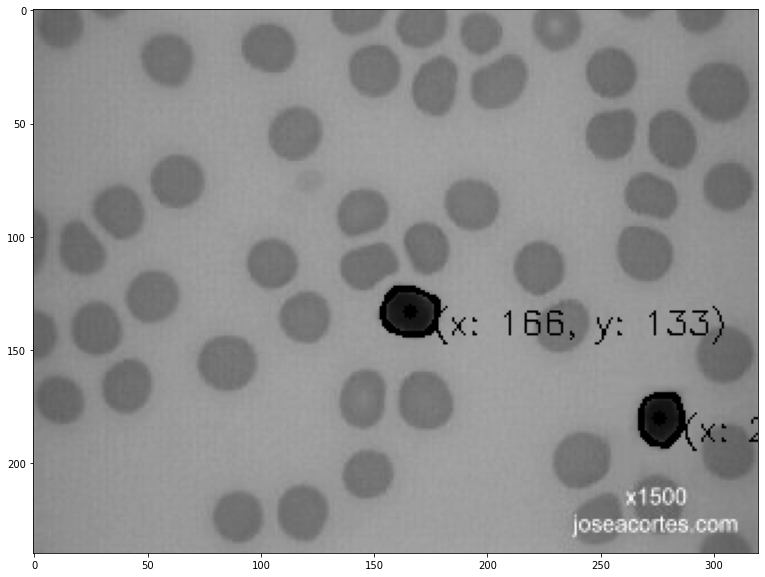

In [ ]:
copy = gris
font = cv2.FONT_HERSHEY_SIMPLEX                                                 # Tipo de letra
for i in contours:
    # Calcular el centro a partir de los momentos  que son una medida particular que indica la dispersión de una nube de puntos
    moments = cv2.moments(i)                                                    
    cx = int(moments['m10']/moments['m00'])
    cy = int(moments['m01']/moments['m00'])
 
    #Dibujar el centro
    cv2.circle(copy,(cx, cy), 3, (0,0,255), -1)
 
    #Escribimos las coordenadas del centro
    cv2.putText(copy,"(x: " + str(cx) + ", y: " + str(cy) + ")",(cx+10,cy+10), font, 0.5,(0,0,255),1 ) # putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])
plt.figure(figsize=(20,10))
plt.imshow( copy, cmap='gray')
